## Chapter 2: Accessing Text Corpora and Lexical Resources



**1.1 Gutenberg Corpus**  
`nltk.Text` reminder  
`gutenberg.words()`  
`gutenberg.raw()`  
`gutenberg.sents()`  

**1.3 The Brown Corpus**  
_stylistics_  
_conditional frequency distributions_  
`nltk.ConditionalFreqDist()`  
`nltk.ConditionalFreqDist.tabulate()`  

**1.5 The Inaugural Corpus**  
`nltk.ConditionalFreqDist.plot()`  
`nktk.corpus.PlaintextCorpusReader`  


**2 Conditional Frequency Definitions**  
_conditional frequency distributions_  
_events_ and _conditions_  


#### 1.1 Gutenberg Corpus

The NLTK has a number of corpora built-in. One of them is a collection of texts from Project Gutenberg:

In [2]:
import nltk


nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
len(emma)

192427

With a `.txt` file, you can't do concordancing. You need to make it an `nltk.Text` object:

In [6]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
emma.concordance('surprize')

Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agre
the mode of it , the my

The `gutenberg` object has a `words()` method. Let's look at it and some other methods:

In [8]:
from nltk.corpus import gutenberg

gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [11]:
emma = gutenberg.words('austen-emma.txt')

for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


The `.raw()` class method puts out raw text; `.sents()` divides the text into sentences (as lists of words), and `.words()` finds the number of words (non-unique).

These are only some of the corpus class methods included; more are coming later.

#### 1.3 Brown Corpus

The Brown Corpus was the first corpus with 1M+ words. Let's look at how it can be accessed.

In [12]:
from nltk.corpus import brown


brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [13]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

We can use the Brown Corpus to study _systematic differences between genres_, aka **_stylistics_**. 

In [16]:
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
    print(m + ":", fdist[m], end=' ')
    # end=' ' prints on one line.

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

The NLTK has support for [**_conditional frequency distributions_**](http://www.nltk.org/api/nltk.html#module-nltk.probability):

In [17]:
cfd = nltk.ConditionalFreqDist(
        (genre, word)
        for genre in brown.categories()
        for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']

cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


#### 1.5 Inagural Address Corpus

We can investigate a corpus by time:

In [19]:
from nltk.corpus import inaugural

inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

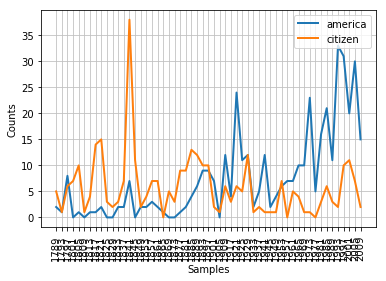

In [22]:
% matplotlib inline
cfd = nltk.ConditionalFreqDist((target, fileid[:4]) for fileid in inaugural.fileids() for w in inaugural.words(fileid) for target in ['america', 'citizen'] if w.lower().startswith(target))
cfd.plot()

Don't forget you can use `help(nltk.corpus.reader)` to see more corpus commands.

#### 1.9 Loading Your Own Corpus

You can do this by using a `nktk.corpus.PlaintextCorpusReader()` object.

### 2. Conditional Frequency Distributions

A **_conditional frequency distribution_** is a collection of frequency distributions, each describing _"events"_ (e.g. appearance of words in a text) in a _"condition"_ (e.g. genre of text).

Because it's event + condition, a CDF is represented by a tuple (`condition`, `event`). For example:

> `('news', 'war')`

#### 2.2 Counting Words by Genre

`ConditionalFreqDist()` takes 2-tuples:

In [25]:
cfd = nltk.ConditionalFreqDist(
        (genre, word)  # the (condition, event) tuple desc'bd above
        for genre in brown.categories()
        for word in brown.words(categories=genre))

Here's a sort of confusing example the book immediately pivots to, in which we're making a list of all the words in the `condition` `'news'` and `'romance'`

In [27]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]

len(genre_word)

170576